<a href="https://colab.research.google.com/github/rpenal/IntroOptimizacion/blob/main/Ejercicios%20conjuntos%20convexos/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.7.1 on the current Colab Runtime...
2022-04-29 20:43:39 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.1-linux-x86_64.tar.gz [123374573/123374573] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.7

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [114]:
versioninfo()

Julia Version 1.7.1
Commit ac5cc99908 (2021-12-22 19:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


In [115]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


Lo principal es ubica los puntos que tengan el menor y mayor angulo con el eje x. De esta forma podemos dar un limite superior e inferior para el cono.

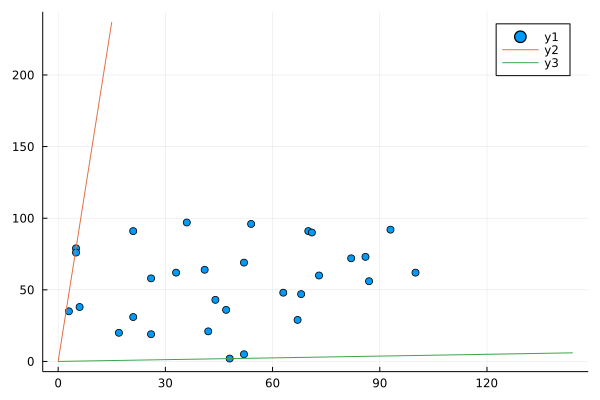

In [113]:
#Para R2
using Plots


Puntos = rand(1:100,2,30)

function calcTheta(y,x)
  if x != 0 && y != 0
    return atan(y,x)
  elseif x == 0 && y != 0
    if y > 0
      return pi/2
    elseif y < 0
      return -3*pi/2
    else
      return 0
    end
  elseif x != 0 && y == 0
    if x >= 0
      return 0
    elseif x < 0
      return pi
    end
  else
    return 0
  end
end

minpoint = Puntos[:,1]
maxpoint = Puntos[:,1]

mintheta = calcTheta(minpoint[:,1][2],minpoint[:,1][1])
maxtheta = calcTheta(maxpoint[:,1][2],maxpoint[:,1][1])

for i in 2:size(Puntos,2)
  theta = calcTheta(Puntos[:,i][2],Puntos[:,i][1])
  if theta < mintheta
    minpoint = Puntos[:,i]
    mintheta = theta
  elseif theta > maxtheta
    maxpoint = Puntos[:,i]
    maxtheta = theta
  end
end

maxpointdraw = 3 * maxpoint
minpointdraw = 3 * minpoint


plot(Puntos[1,:], Puntos[2,:],seriestype = :scatter)
plot!([0,maxpointdraw[1]],[0,maxpointdraw[2]])
plot!([0,minpointdraw[1]],[0,minpointdraw[2]])